In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("pap_smear_old.csv")
df

,Unnamed: 0,Cyto_A,CytoShort,KerneShort,CytoLong,KerneLong,CytoRund,K/C,Kerne_Ycol,CytoPeri,Cyto_Ycol,Kerne_A,KernePeri,KerneMax,KerneMin,target
0,0,606.96,22.12,10.90,42.11,15.03,0.4358,0.167350,0.60,226.30,0.75,121.99,61.88,53,37,0
1,1,440.56,18.29,8.96,35.82,13.36,0.4372,0.166774,0.52,190.69,0.75,88.18,48.49,43,24,0
2,2,234.47,12.82,7.20,37.63,15.44,0.2108,0.228844,0.57,156.50,0.77,69.58,63.94,34,19,0
3,3,366.92,15.17,6.99,37.26,12.62,0.3365,0.088941,0.54,171.47,0.76,35.82,69.66,19,11,0
4,4,277.87,12.57,7.19,35.48,11.53,0.2811,0.142615,0.54,147.28,0.73,46.22,65.29,20,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,201.65,16.49,11.37,39.50,21.08,0.1646,0.468825,0.61,155.62,0.88,177.98,66.47,50,36,1
496,496,63.56,18.24,16.56,33.07,25.80,0.0740,0.835050,0.63,114.71,0.84,321.77,81.22,86,60,1
497,497,220.81,17.68,9.89,39.39,23.22,0.1812,0.424044,0.53,182.46,0.76,162.57,84.71,63,50,1
498,498,430.36,32.93,16.86,38.95,21.71,0.3612,0.391322,0.49,232.68,0.82,276.68,74.46,76,55,1


In [4]:
df.shape

(500, 16)

## Let's start train some models

In [5]:
## SVM
X = df.drop(columns=["target"])
Y = df.target
print(X.shape)
print(Y.shape)

(500, 15)
(500,)


In [6]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [58]:
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [59]:
pipeline_svm=Pipeline([('scalar1',Normalizer()),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [60]:
pipeline_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar1', Normalizer(copy=True, norm='l2')),
                ('SVM',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [61]:
## Prediction
y_pred = pipeline_svm.predict(X_train)

In [62]:
## Evaluation 
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.98


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline_svm, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.95 , 0.975, 0.95 , 1.   , 0.975, 1.   , 0.975, 1.   , 0.95 ,
       0.975])

In [64]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average=None)

array([0.97452229, 0.98353909])

In [65]:
from sklearn.decomposition import PCA
pipeline_svm_pca=Pipeline([('scalar1',Normalizer()),('pca1',PCA(n_components=2)),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [66]:
pipeline_svm_pca.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar1', Normalizer(copy=True, norm='l2')),
                ('pca1',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVM',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [67]:
## Prediction
y_pred = pipeline_svm_pca.predict(X_train)

In [68]:
## Evaluation 
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9425


In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline_svm_pca, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.9  , 0.925, 0.9  , 1.   , 0.975, 0.95 , 0.95 , 0.95 , 0.95 ,
       0.9  ])

In [70]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average=None)

array([0.92744479, 0.95238095])

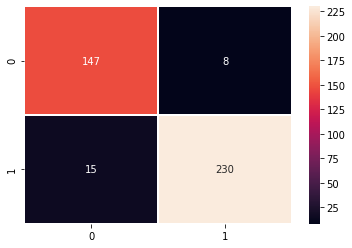

In [71]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [55]:
## Optimaze the model
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20,100],
        'kernel': ['rbf','linear','poly']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=10
) 

In [56]:
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.6125
1,20,poly,0.9950
2,100,poly,0.9950
3,10,linear,1.0000
4,10,rbf,0.6125
5,1,poly,0.9950
6,10,poly,0.9950
7,100,rbf,0.6125
8,1,rbf,0.6125
9,100,linear,1.0000
